### Loading dataset

In [1]:
data_csv1='https://cdn.skillenza.com/files/6031752b-de52-403c-9211-a21975d0bc02/training_.csv'

In [2]:
import pandas as pd
import numpy as np

In [3]:
train_data=pd.read_csv(data_csv1)

In [4]:
train_data.head()

,S.No,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,1,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,3,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,4,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,5,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [5]:
data_csv2='https://cdn.skillenza.com/files/6faa5aed-2e5c-4236-b504-ea0ab7ab2ac2/test.csv'

In [6]:
test_data=pd.read_csv(data_csv2)

In [7]:
test_data.head()

,S.No,Timestamp,Age,Gender,Country,state,self_employed,family_history,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,1,2014-08-29 11:32:22,39,Male,United Kingdom,NaN,Yes,Yes,Sometimes,1-5,...,Somewhat difficult,No,No,Yes,Yes,No,Maybe,Yes,Yes,These result may be a tad confusing so a summa...
1,2,2014-08-29 11:32:44,26,female,United States,WA,No,Yes,Sometimes,More than 1000,...,Don't know,No,No,Some of them,Yes,No,Maybe,No,Yes,I should note one of the places my employer fa...
2,3,2014-08-29 11:33:54,23,Female,United States,IL,No,Yes,Sometimes,26-100,...,Somewhat difficult,Yes,No,No,Some of them,No,Maybe,No,No,NaN
3,4,2014-08-29 11:34:07,35,Male,Switzerland,NaN,No,Yes,Often,More than 1000,...,Very easy,No,No,Some of them,Some of them,No,Maybe,No,No,NaN
4,5,2014-08-29 11:36:38,36,Male,United States,FL,No,No,Never,1-5,...,Very easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN


In [8]:
train_data.shape

(1048, 28)

In [9]:
test_data.shape

(210, 27)

### Checking missing values

In [10]:
train_data.isnull().sum()

S.No                           0
Timestamp                      0
Age                            0
Gender                         0
Country                        0
state                        412
self_employed                 18
family_history                 0
treatment                      0
work_interfere               236
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
comments                     916
dtype: int64

In [11]:
train_data.shape

(1048, 28)

In [12]:
#missing value imputation for 2 variables

### Checking levels for all the categorical variables and then reducing levels if required

In [13]:
train_data['Gender'].value_counts().sort_values(ascending=False).head(20)

Male                        518
male                        162
M                           100
Female                       99
female                       48
F                            33
m                            30
f                            13
Make                          4
Man                           2
Female                        2
Female (trans)                2
Cis Male                      2
Woman                         2
Female (cis)                  1
queer                         1
Genderqueer                   1
A little about you            1
male leaning androgynous      1
Malr                          1
Name: Gender, dtype: int64

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [18]:
def gender_value(Gender):
    if Gender in['Male','male','M','m','Make','Man','Cis Male']:
        return 'Male'
    elif Gender in['Female','female','F','f','Woman']:
        return 'Female'
    else:
        return 'Other'
    
train_data['Gender']=train_data['Gender'].apply(gender_value)            

In [19]:
train_data['Gender'].value_counts().sort_values(ascending=False).head(20)

Male      818
Female    195
Other      35
Name: Gender, dtype: int64

In [22]:
pd.crosstab(train_data['Gender'],train_data['treatment'],rownames=['Gender'],colnames=['treatment'],margins=True)

treatment,No,Yes,All
Gender,,,
Female,62,133,195
Male,461,357,818
Other,13,22,35
All,536,512,1048


<AxesSubplot:xlabel='Gender', ylabel='count'>

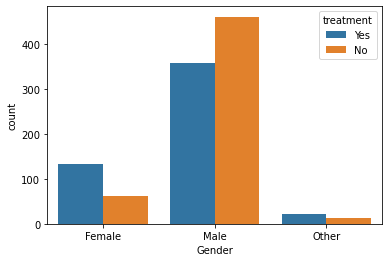

In [21]:
sns.countplot(x='Gender',hue='treatment',data=train_data)

In [23]:
train_data['Country'].value_counts()

United States             644
United Kingdom            153
Canada                     64
Germany                    37
Australia                  18
Netherlands                18
Ireland                    13
France                     11
India                       8
New Zealand                 6
Switzerland                 6
Sweden                      6
Italy                       6
Poland                      5
Brazil                      5
South Africa                4
Israel                      4
Belgium                     4
Russia                      3
Bulgaria                    3
Mexico                      3
Austria                     3
Denmark                     2
Singapore                   2
Portugal                    2
Finland                     2
Latvia                      1
Hungary                     1
Bosnia and Herzegovina      1
Slovenia                    1
Bahamas, The                1
Spain                       1
Costa Rica                  1
Nigeria   

In [26]:
pd.crosstab(train_data['Country'],train_data['treatment'],rownames=['Country'],colnames=['treatment'],margins=True)

treatment,No,Yes,All
Country,,,
Australia,8,10,18
Austria,3,0,3
"Bahamas, The",0,1,1
Belgium,3,1,4
Bosnia and Herzegovina,1,0,1
Brazil,4,1,5
Bulgaria,2,1,3
Canada,32,32,64
Colombia,1,0,1


<AxesSubplot:xlabel='Country', ylabel='count'>

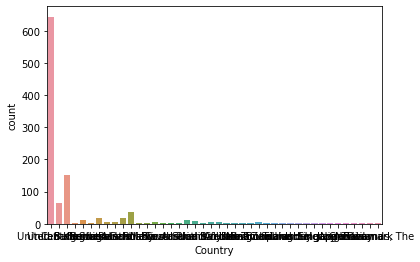

In [25]:
sns.countplot(x="Country",data=train_data)

In [27]:
def country_value(Country):
    if Country=='United States':
        return 'US'
    elif Country=='United Kingdom':
        return 'UK'
    elif Country=='Canada':
        return 'CN'
    elif Country=='Germany':
        return 'GR'
    else:
        return 'Other'
    
train_data['Country']=train_data['Country'].apply(country_value)            

In [28]:
train_data['Country'].value_counts()

US       644
UK       153
Other    150
CN        64
GR        37
Name: Country, dtype: int64

<AxesSubplot:xlabel='Country', ylabel='count'>

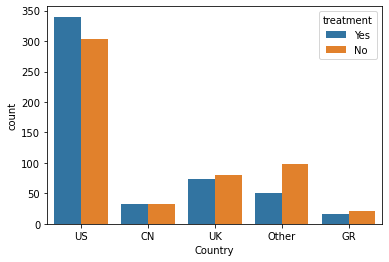

In [29]:
sns.countplot(x='Country',hue='treatment',data=train_data)

In [30]:
train_data['state'].value_counts()

CA    123
WA     60
NY     49
TN     39
TX     38
OR     26
PA     26
OH     24
IL     21
IN     20
MA     20
MI     19
MN     17
MO     12
GA     12
VA     12
NC     10
FL     10
WI     10
CO      9
AZ      7
MD      7
UT      6
OK      5
KY      5
SC      4
IA      4
CT      4
DC      4
AL      4
KS      3
NV      3
SD      3
NH      3
NJ      3
WY      2
NM      2
NE      2
VT      2
ME      1
RI      1
ID      1
WV      1
LA      1
MS      1
Name: state, dtype: int64

<AxesSubplot:xlabel='state', ylabel='count'>

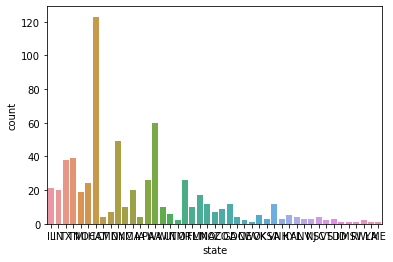

In [31]:
sns.countplot(x="state",data=train_data)

### since there are so many levels in 'state' and almost 40% nan values,so we will drop this variable as well

In [32]:
train_data['self_employed'].value_counts()

No     906
Yes    124
Name: self_employed, dtype: int64

In [34]:
#replacing missing/nan values with 'mode'for categorical variables 
train_data['self_employed'].fillna('No',inplace=True)

<AxesSubplot:xlabel='self_employed', ylabel='count'>

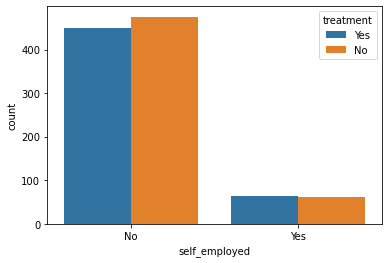

In [35]:
sns.countplot(x='self_employed',hue='treatment',data=train_data)

In [36]:
train_data['family_history'].value_counts()

No     643
Yes    405
Name: family_history, dtype: int64

<AxesSubplot:xlabel='family_history', ylabel='count'>

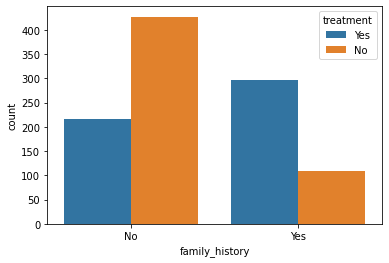

In [37]:
sns.countplot(x='family_history',hue='treatment',data=train_data)

In [38]:
train_data['work_interfere'].value_counts()

Sometimes    386
Never        178
Rarely       144
Often        104
Name: work_interfere, dtype: int64

In [40]:
#replacing missing/nan values with 'mode'for categorical variables 
train_data['work_interfere'].fillna('Sometimes',inplace=True)

<AxesSubplot:xlabel='work_interfere', ylabel='count'>

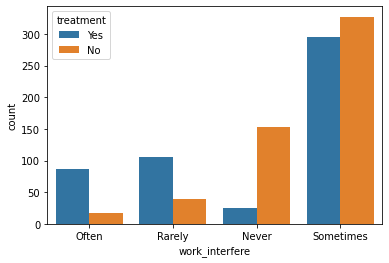

In [41]:
sns.countplot(x='work_interfere',hue='treatment',data=train_data)

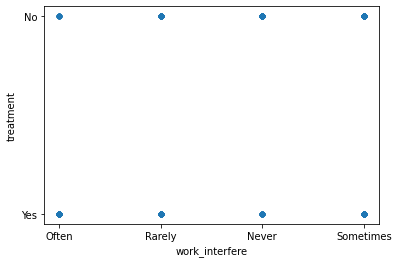

In [46]:
train_data.plot.scatter(x='work_interfere',y='treatment');

In [47]:
train_data['no_employees'].value_counts()

6-25              245
26-100            238
More than 1000    227
100-500           150
1-5               133
500-1000           55
Name: no_employees, dtype: int64

<AxesSubplot:xlabel='no_employees', ylabel='count'>

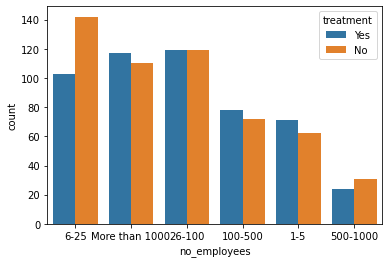

In [48]:
sns.countplot(x='no_employees',hue='treatment',data=train_data)

In [50]:
train_data['remote_work'].value_counts()

No     733
Yes    315
Name: remote_work, dtype: int64

<AxesSubplot:xlabel='remote_work', ylabel='count'>

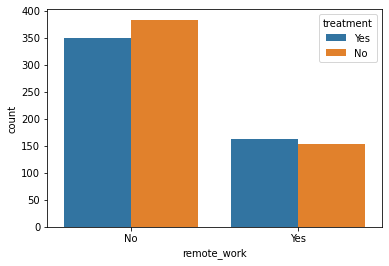

In [51]:
sns.countplot(x='remote_work',hue='treatment',data=train_data)

In [52]:
train_data['tech_company'].value_counts()

Yes    870
No     178
Name: tech_company, dtype: int64

<AxesSubplot:xlabel='tech_company', ylabel='count'>

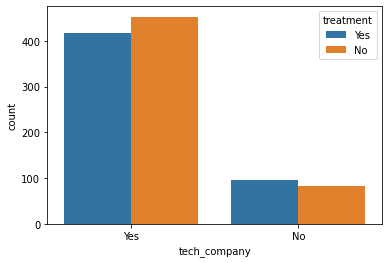

In [53]:
sns.countplot(x='tech_company',hue='treatment',data=train_data)

In [54]:
train_data['benefits'].value_counts()

Yes           400
Don't know    342
No            306
Name: benefits, dtype: int64

<AxesSubplot:xlabel='benefits', ylabel='count'>

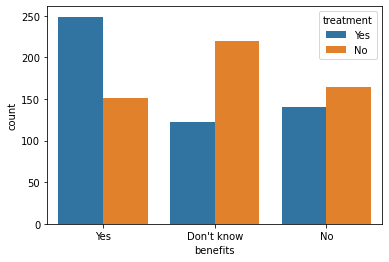

In [55]:
sns.countplot(x='benefits',hue='treatment',data=train_data)

In [56]:
train_data['care_options'].value_counts()

No          422
Yes         363
Not sure    263
Name: care_options, dtype: int64

<AxesSubplot:xlabel='care_options', ylabel='count'>

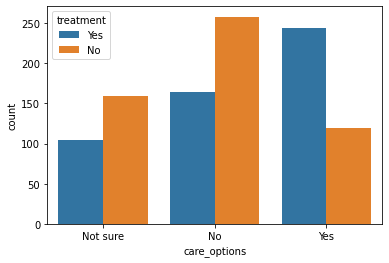

In [57]:
sns.countplot(x='care_options',hue='treatment',data=train_data)

In [58]:
train_data['wellness_program'].value_counts()

No            692
Yes           193
Don't know    163
Name: wellness_program, dtype: int64

<AxesSubplot:xlabel='wellness_program', ylabel='count'>

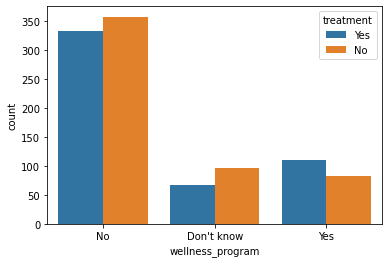

In [59]:
sns.countplot(x='wellness_program',hue='treatment',data=train_data)

In [60]:
train_data['seek_help'].value_counts()

No            534
Don't know    309
Yes           205
Name: seek_help, dtype: int64

<AxesSubplot:xlabel='seek_help', ylabel='count'>

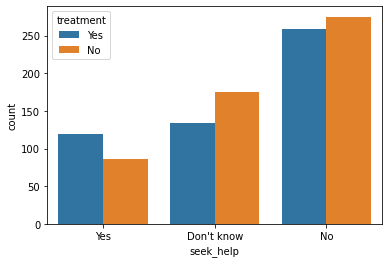

In [61]:
sns.countplot(x='seek_help',hue='treatment',data=train_data)

In [62]:
train_data['anonymity'].value_counts()

Don't know    685
Yes           311
No             52
Name: anonymity, dtype: int64

<AxesSubplot:xlabel='anonymity', ylabel='count'>

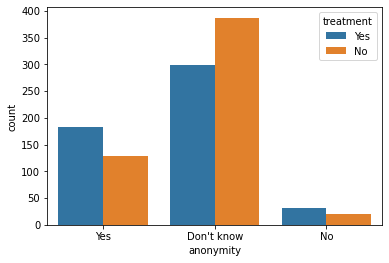

In [63]:
sns.countplot(x='anonymity',hue='treatment',data=train_data)

In [64]:
train_data['leave'].value_counts()

Don't know            466
Somewhat easy         218
Very easy             176
Somewhat difficult    107
Very difficult         81
Name: leave, dtype: int64

In [65]:
train_data['mental_health_consequence'].value_counts()

No       424
Maybe    380
Yes      244
Name: mental_health_consequence, dtype: int64

In [66]:
train_data['phys_health_consequence'].value_counts()

No       773
Maybe    227
Yes       48
Name: phys_health_consequence, dtype: int64

In [67]:
train_data['coworkers'].value_counts()

Some of them    651
No              209
Yes             188
Name: coworkers, dtype: int64

In [68]:
train_data['supervisor'].value_counts()

Yes             439
No              320
Some of them    289
Name: supervisor, dtype: int64

In [69]:
train_data['mental_health_interview'].value_counts()

No       835
Maybe    177
Yes       36
Name: mental_health_interview, dtype: int64

In [70]:
train_data['phys_health_interview'].value_counts()

Maybe    461
No       419
Yes      168
Name: phys_health_interview, dtype: int64

In [71]:
train_data['mental_vs_physical'].value_counts()

Don't know    471
Yes           297
No            280
Name: mental_vs_physical, dtype: int64

In [72]:
train_data['obs_consequence'].value_counts()

No     902
Yes    146
Name: obs_consequence, dtype: int64

### we are checking outliers in variable 'Age' and then removing them

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

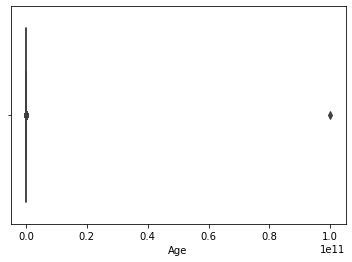

In [74]:
import seaborn as sns
sns.boxplot(train_data['Age'])

In [75]:
#generating q1,q3 and iqr 
q1=train_data['Age'].quantile(0.25)
q3=train_data['Age'].quantile(0.75)
iqr=q3-q1
print(iqr)

9.0


In [79]:
#removing values which are lower than 3*iqr and higher than 3*q3 -as the values which are below or above this is insignificant outlier
train_data=train_data[(train_data['Age']> (q1-1.5*iqr)) & (train_data['Age']<(q3+1.5*iqr))]

In [80]:
train_data['Age'].describe()

count    1015.00000
mean       31.31330
std         6.22494
min        18.00000
25%        27.00000
50%        31.00000
75%        35.00000
max        49.00000
Name: Age, dtype: float64

<AxesSubplot:ylabel='Frequency'>

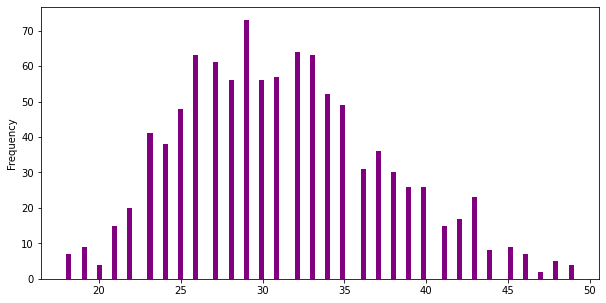

In [81]:
train_data['Age'].plot.hist(bins=100,figsize=(10,5),color='purple')

In [82]:
#dropping columns for which missing value is very high and which are not required

train_data=train_data.drop(['S.No'],axis=1)
train_data=train_data.drop(['Timestamp'],axis=1)
train_data=train_data.drop(['state'],axis=1)
train_data=train_data.drop(['comments'],axis=1)

In [83]:
train_data.isnull().sum()

Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [84]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1015 entries, 0 to 1047
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1015 non-null   int64 
 1   Gender                     1015 non-null   object
 2   Country                    1015 non-null   object
 3   self_employed              1015 non-null   object
 4   family_history             1015 non-null   object
 5   treatment                  1015 non-null   object
 6   work_interfere             1015 non-null   object
 7   no_employees               1015 non-null   object
 8   remote_work                1015 non-null   object
 9   tech_company               1015 non-null   object
 10  benefits                   1015 non-null   object
 11  care_options               1015 non-null   object
 12  wellness_program           1015 non-null   object
 13  seek_help                  1015 non-null   object
 14  anonymit

In [85]:
train_data.head(30)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,US,No,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,Male,US,No,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,CN,No,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,UK,No,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,US,No,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
5,33,Male,US,No,Yes,No,Sometimes,6-25,No,Yes,...,Don't know,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No
6,35,Female,US,No,Yes,Yes,Sometimes,1-5,Yes,Yes,...,No,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No
7,39,Male,CN,No,No,No,Never,1-5,Yes,Yes,...,Yes,Don't know,No,No,No,No,No,No,No,No
8,42,Female,US,No,Yes,Yes,Sometimes,100-500,No,Yes,...,No,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No
9,23,Male,CN,No,No,No,Never,26-100,No,Yes,...,Don't know,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No


### creating dummy variables for all categorical variables

In [86]:
train_data_dummy=pd.get_dummies(train_data,drop_first=True)

In [87]:
train_data_dummy.head(30)

,Age,Gender_Male,Gender_Other,Country_GR,Country_Other,Country_UK,Country_US,self_employed_Yes,family_history_Yes,treatment_Yes,...,coworkers_Yes,supervisor_Some of them,supervisor_Yes,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_No,mental_vs_physical_Yes,obs_consequence_Yes
0,37,0,0,0,0,0,1,0,0,1,...,0,0,1,1,0,0,0,0,1,0
1,44,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,32,1,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,1,0,0
3,31,1,0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,1,0,1
4,31,1,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,1,0,0,0
5,33,1,0,0,0,0,1,0,1,0,...,1,0,1,1,0,0,0,0,0,0
6,35,0,0,0,0,0,1,0,1,1,...,0,0,0,1,0,1,0,0,0,0
7,39,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
8,42,0,0,0,0,0,1,0,1,1,...,1,0,1,1,0,0,0,1,0,0
9,23,1,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [88]:
train_data_dummy.shape

(1015, 49)

In [89]:
#splitting Input and output variable

X_train = train_data_dummy.drop(['treatment_Yes'],axis=1)
y_train = train_data_dummy['treatment_Yes']

In [90]:
#splitting traindataset into train and vallid data

from sklearn.model_selection import train_test_split
X_train,X_test1,y_train,y_test1=train_test_split(X_train,
                                               y_train,test_size=0.30,random_state=0)

In [91]:
print("X_train",X_train.shape)
print('X_test1',X_test1.shape)
print('y_train',y_train.shape)
print('y_test1',y_test1.shape)

X_train (710, 48)
X_test1 (305, 48)
y_train (710,)
y_test1 (305,)


In [92]:
from sklearn import tree
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

## logistic Regression

In [93]:
#fitting the model

from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [94]:
#Prediction on test1 data

prediction =log_reg.predict(X_test1)
prediction

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,

In [95]:
#model Evaluation using performance measures

from sklearn.metrics import classification_report


In [96]:
#Performance measures/ratios
classification_report(y_test1,prediction)

'              precision    recall  f1-score   support\n\n           0       0.74      0.77      0.75       149\n           1       0.77      0.74      0.75       156\n\n    accuracy                           0.75       305\n   macro avg       0.75      0.75      0.75       305\nweighted avg       0.75      0.75      0.75       305\n'

In [97]:
#confusion matrix
from sklearn.metrics import confusion_matrix

In [98]:
confusion_matrix(y_test1,prediction)

array([[115,  34],
       [ 41, 115]])

In [99]:
#reporting the final accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test1,prediction)*100

75.40983606557377

In [101]:
print('Accuracy:',metrics.accuracy_score(y_test1,prediction))

Accuracy: 0.7540983606557377


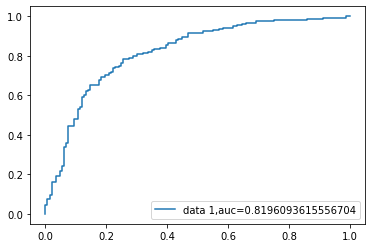

In [103]:
#ROC curve
y_pred_proba=log_reg.predict_proba(X_test1)[::,1]
fpr,tpr,_ =metrics.roc_curve(y_test1,y_pred_proba)
auc=metrics.roc_auc_score(y_test1,y_pred_proba)
plt.plot(fpr,tpr,label='data 1,auc='+str(auc))
plt.legend(loc=4)
plt.show()

## Decision Tree Classifier

In [104]:
clf_DT=DecisionTreeClassifier(criterion='gini',random_state=0)

In [105]:
#creating model using train data
model_DT=clf_DT.fit(X_train,y_train)

#prediction on test data
y_pred_DT=model_DT.predict(X_test1)
y_pred_DT

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

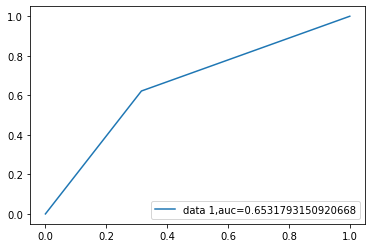

In [107]:
#ROC Curve

y_pred_proba=model_DT.predict_proba(X_test1)[::,1]
fpr,tpr,_ =metrics.roc_curve(y_test1,y_pred_proba)
auc=metrics.roc_auc_score(y_test1,y_pred_proba)
plt.plot(fpr,tpr,label='data 1,auc='+str(auc))
plt.legend(loc=4)
plt.show()

In [108]:
print('Accuracy:',metrics.accuracy_score(y_test1,y_pred_DT))

Accuracy: 0.6524590163934426


In [110]:
confusion_matrix(y_test1,y_pred_DT)

array([[102,  47],
       [ 59,  97]])

In [116]:
#Performance measures/ratios
classification_report(y_test1,y_pred_DT)

'              precision    recall  f1-score   support\n\n           0       0.63      0.68      0.66       149\n           1       0.67      0.62      0.65       156\n\n    accuracy                           0.65       305\n   macro avg       0.65      0.65      0.65       305\nweighted avg       0.65      0.65      0.65       305\n'

## Random Tree

In [113]:
from sklearn.ensemble import RandomForestClassifier

clf_RF=RandomForestClassifier(random_state=0)

#train model
model_RF=clf_RF.fit(X_train,y_train)
#prediction
y_pred_RF=model_RF.predict(X_test1)
y_pred_RF

array([0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,

In [114]:
print('Accuracy:',metrics.accuracy_score(y_test1,y_pred_RF))

Accuracy: 0.7377049180327869


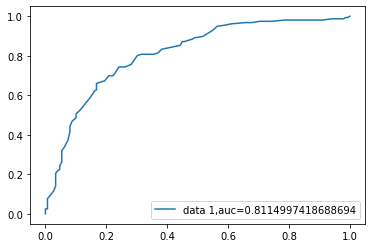

In [115]:
#ROC Curve

y_pred_proba=model_RF.predict_proba(X_test1)[::,1]
fpr,tpr,_ =metrics.roc_curve(y_test1,y_pred_proba)
auc=metrics.roc_auc_score(y_test1,y_pred_proba)
plt.plot(fpr,tpr,label='data 1,auc='+str(auc))
plt.legend(loc=4)
plt.show()

In [117]:
#Performance measures/ratios
classification_report(y_test1,y_pred_RF)

'              precision    recall  f1-score   support\n\n           0       0.71      0.78      0.74       149\n           1       0.77      0.70      0.73       156\n\n    accuracy                           0.74       305\n   macro avg       0.74      0.74      0.74       305\nweighted avg       0.74      0.74      0.74       305\n'

## Adaboost classifier

In [118]:
from sklearn.ensemble import AdaBoostClassifier

clf_ABC1=AdaBoostClassifier(n_estimators=50,learning_rate=1,random_state=0)

#train model

clf_ABC1=clf_ABC1.fit(X_train,y_train)

#predicting the model

y_pred_ABC1=clf_ABC1.predict(X_test1)

In [119]:
y_pred_ABC1

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,

In [120]:
print('Accuracy:',metrics.accuracy_score(y_test1,y_pred_ABC1))

Accuracy: 0.7344262295081967


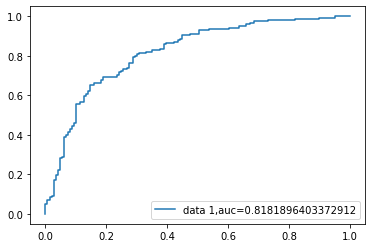

In [121]:
#ROC Curve

y_pred_proba=clf_ABC1.predict_proba(X_test1)[::,1]
fpr,tpr,_ =metrics.roc_curve(y_test1,y_pred_proba)
auc=metrics.roc_auc_score(y_test1,y_pred_proba)
plt.plot(fpr,tpr,label='data 1,auc='+str(auc))
plt.legend(loc=4)
plt.show()

In [122]:
#Performance measures/ratios
classification_report(y_test1,y_pred_ABC1)

'              precision    recall  f1-score   support\n\n           0       0.73      0.73      0.73       149\n           1       0.74      0.74      0.74       156\n\n    accuracy                           0.73       305\n   macro avg       0.73      0.73      0.73       305\nweighted avg       0.73      0.73      0.73       305\n'

## Since logistic regression is giveing best auc score i.e 81.9% we will predict our test data with log model

### Checking missing values for test data

In [ ]:
test_data.isnull().sum()

In [124]:
#dropping columns for which missing value is very high and which are not required

test_data=test_data.drop(['Timestamp'],axis=1)
test_data=test_data.drop(['state'],axis=1)
test_data=test_data.drop(['comments'],axis=1)

In [125]:
#storing 'S.NO' seperatetly and dropping the same from test data
finalo_p=test_data['S.No']

test_data=test_data.drop(['S.No'],axis=1)

In [126]:
test_data['work_interfere'].value_counts()

Sometimes    79
Often        39
Never        35
Rarely       29
Name: work_interfere, dtype: int64

In [127]:
#missing value imputation
test_data['work_interfere'].fillna('Sometimes',inplace=True)

### Checking levels for 'gender' variable and reducing the same

In [128]:
test_data['Gender'].value_counts().sort_values(ascending=False)

Male                                              96
male                                              44
Female                                            22
M                                                 16
female                                            14
F                                                  5
m                                                  4
f                                                  2
Male                                               2
Woman                                              1
p                                                  1
femail                                             1
Cis Man                                            1
ostensibly male, unsure what that really means     1
Name: Gender, dtype: int64

In [129]:
def gender_value(Gender):
    if Gender in['Male','male','M','m','Make','Man','Cis Male']:
        return 'Male'
    elif Gender in['Female','female','F','f','Woman']:
        return 'Female'
    else:
        return 'Other'
    
test_data['Gender']=test_data['Gender'].apply(gender_value) 

In [130]:
test_data['Gender'].value_counts().sort_values(ascending=False)

Male      160
Female     44
Other       6
Name: Gender, dtype: int64

In [131]:
def country_value(Country):
    if Country=='United States':
        return 'US'
    elif Country=='United Kingdom':
        return 'UK'
    elif Country=='Canada':
        return 'CN'
    elif Country=='Germany':
        return 'GR'
    else:
        return 'Other'
    
test_data['Country']=test_data['Country'].apply(country_value)            

In [132]:
test_data['Country'].value_counts()

US       106
Other     56
UK        32
GR         8
CN         8
Name: Country, dtype: int64

In [133]:
test_data.head()

,Age,Gender,Country,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,39,Male,UK,Yes,Yes,Sometimes,1-5,Yes,Yes,No,...,Yes,Somewhat difficult,No,No,Yes,Yes,No,Maybe,Yes,Yes
1,26,Female,US,No,Yes,Sometimes,More than 1000,No,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,No,Yes
2,23,Female,US,No,Yes,Sometimes,26-100,No,No,No,...,Don't know,Somewhat difficult,Yes,No,No,Some of them,No,Maybe,No,No
3,35,Male,Other,No,Yes,Often,More than 1000,No,Yes,Don't know,...,Yes,Very easy,No,No,Some of them,Some of them,No,Maybe,No,No
4,36,Male,US,No,No,Never,1-5,Yes,Yes,Don't know,...,Don't know,Very easy,No,No,Some of them,Some of them,No,No,Don't know,No


In [134]:
X_test=pd.get_dummies(test_data,drop_first=True)

In [135]:
X_test.head()

,Age,Gender_Male,Gender_Other,Country_GR,Country_Other,Country_UK,Country_US,self_employed_Yes,family_history_Yes,work_interfere_Often,...,coworkers_Yes,supervisor_Some of them,supervisor_Yes,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_No,mental_vs_physical_Yes,obs_consequence_Yes
0,39,1,0,0,0,1,0,1,1,0,...,1,0,1,1,0,0,0,0,1,1
1,26,0,0,0,0,0,1,0,1,0,...,0,0,1,1,0,0,0,1,0,1
2,23,0,0,0,0,0,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
3,35,1,0,0,1,0,0,0,1,1,...,0,1,0,1,0,0,0,1,0,0
4,36,1,0,0,0,0,1,0,0,0,...,0,1,0,1,0,1,0,0,0,0


In [136]:
X_test.shape

(210, 48)

In [137]:
#fitting the model

from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [138]:
#Prediction on test1 data

Final_pred =log_reg.predict(X_test)
Final_pred

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=uint8)

### Adding the prediction to test data

In [139]:
test_data['treatment']=Final_pred

In [140]:
test_data.head(20)

,Age,Gender,Country,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,treatment
0,39,Male,UK,Yes,Yes,Sometimes,1-5,Yes,Yes,No,...,Somewhat difficult,No,No,Yes,Yes,No,Maybe,Yes,Yes,1
1,26,Female,US,No,Yes,Sometimes,More than 1000,No,Yes,Yes,...,Don't know,No,No,Some of them,Yes,No,Maybe,No,Yes,1
2,23,Female,US,No,Yes,Sometimes,26-100,No,No,No,...,Somewhat difficult,Yes,No,No,Some of them,No,Maybe,No,No,1
3,35,Male,Other,No,Yes,Often,More than 1000,No,Yes,Don't know,...,Very easy,No,No,Some of them,Some of them,No,Maybe,No,No,1
4,36,Male,US,No,No,Never,1-5,Yes,Yes,Don't know,...,Very easy,No,No,Some of them,Some of them,No,No,Don't know,No,0
5,42,Male,US,No,No,Rarely,More than 1000,No,No,Don't know,...,Don't know,Maybe,No,Some of them,No,No,Maybe,No,No,0
6,39,Male,US,No,Yes,Sometimes,500-1000,No,Yes,Yes,...,Very easy,No,No,Some of them,Yes,No,No,Yes,No,1
7,27,Male,US,No,No,Never,6-25,No,Yes,Don't know,...,Don't know,Maybe,No,Some of them,Yes,Maybe,Maybe,Don't know,No,0
8,33,Male,US,Yes,No,Never,6-25,Yes,Yes,Don't know,...,Very easy,Maybe,No,Some of them,Yes,No,Maybe,Yes,No,0
9,31,Other,CN,No,Yes,Often,More than 1000,No,Yes,Yes,...,Don't know,Maybe,No,Some of them,No,No,Maybe,Don't know,No,1


## converting the final prediction and s.no in csv file

In [141]:
Final=pd.concat([finalo_p,test_data.treatment],axis=1)

In [142]:
Final.to_csv("Final.csv",index=False)

In [143]:
pd.read_csv('Final.csv')

,S.No,treatment
0,1,1
1,2,1
2,3,1
3,4,1
4,5,0
...,...,...
205,206,0
206,207,1
207,208,1
208,209,1
